In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newdataset/all_stocks_5yr.csv


In [16]:
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as pltimport pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/kaggle/input/newdataset/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [20]:
goog = df[df['Name'] == 'GOOG']['close']

<Axes: >

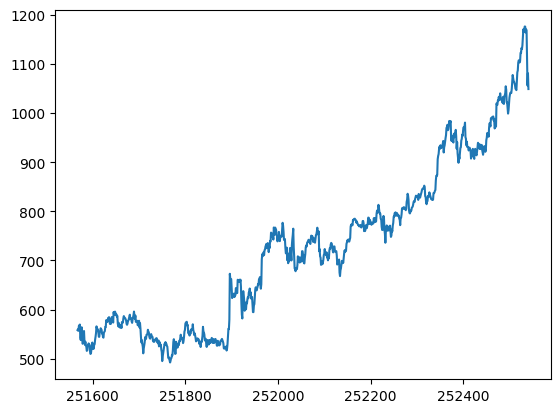

In [21]:
goog.plot()

In [22]:
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [23]:
model = pm.auto_arima(train,
                     error_action='ignore',trace = True,
                     suppress_warnings=True,maxiter=10,
                     seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6923.242, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6919.965, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6920.159, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6920.168, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6920.956, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6922.161, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.815 seconds


In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  945
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3457.982
Date:                Tue, 21 Nov 2023   AIC                           6919.965
Time:                        05:43:19   BIC                           6929.665
Sample:                             0   HQIC                          6923.662
                                - 945                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5314      0.319      1.666      0.096      -0.094       1.157
sigma2        88.9751      1.596     55.757      0.000      85.847      92.103
===================================================================================
Ljung-Box (L1) (Q):                   1.81   Jarque-Bera (JB):              6037.41
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                             1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (0, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


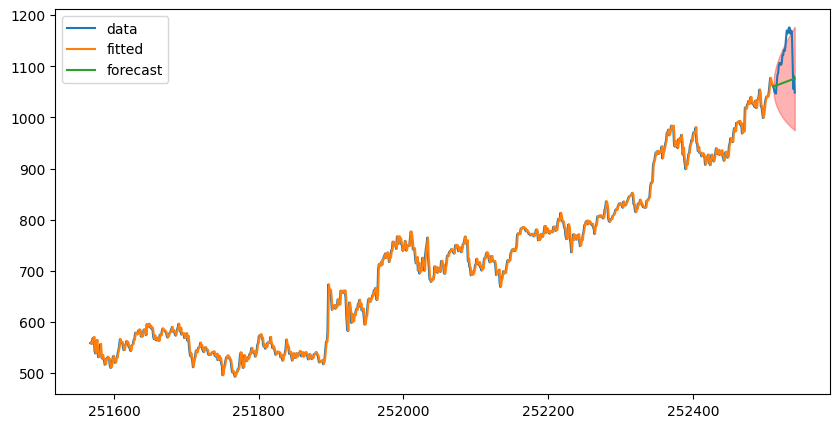

In [27]:
def plot_result(model,fulldata,train,test):
    params = model.get_params()
    d = params['order'][1]
    
    train_pred = model.predict_in_sample(start=d,end = -1)
    test_pred,confint = model.predict(n_periods=Ntest,return_conf_int = True)
    
    fig,ax = plt.subplots(figsize=(10,5))
    ax.plot(fulldata.index,fulldata,label='data')
    ax.plot(train.index[d:],train_pred,label='fitted')
    ax.plot(test.index,test_pred,label='forecast')
    ax.fill_between(test.index, \
                   confint[:,0],confint[:,1], \
                   color = 'red',alpha = 0.3)
    ax.legend()
    
plot_result(model,goog,train,test)
    

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


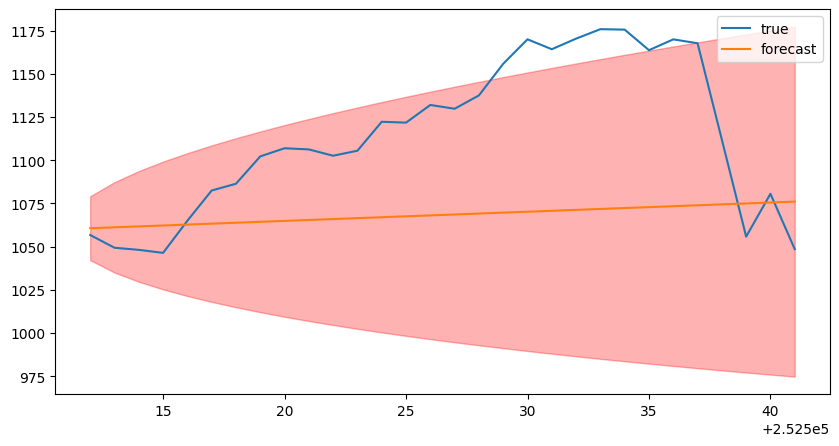

In [28]:
def plot_test(model,test):
    test_pred,confint = model.predict(n_periods=Ntest,return_conf_int = True)
    
    fig,ax = plt.subplots(figsize=(10,5))
    ax.plot(test.index,test,label='true')
    ax.plot(test.index,test_pred,label='forecast')
    ax.fill_between(test.index, \
                   confint[:,0],confint[:,1], \
                   color = 'red',alpha = 0.3)
    ax.legend()
    
plot_test(model,test)
    

In [29]:
def rmse(y,t):
    return np.sqrt(np.mean(t-2)**2)

In [30]:
print("ARIMA rmse",rmse(model.predict(Ntest),test))
print("Niave rmse",rmse(train.iloc[-1],test))

ARIMA rmse 1111.7136666666668
Niave rmse 1111.7136666666668


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4550.718, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4546.830, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4548.203, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4548.169, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4548.775, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4550.106, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.847 seconds


{'maxiter': 10,
 'method': 'lbfgs',
 'order': (0, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

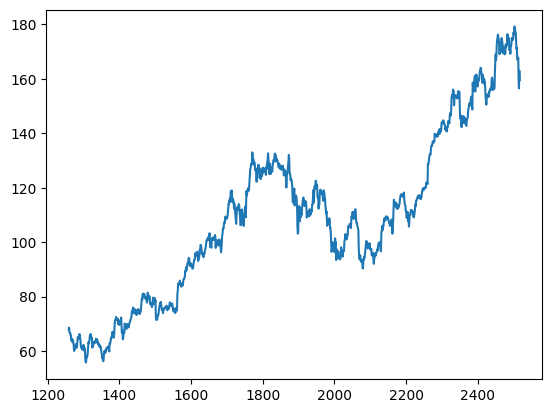

In [31]:
# APPLE stocks
goog = df[df['Name'] == 'AAPL']['close']
goog.plot()
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

model = pm.auto_arima(train,
                     error_action='ignore',trace = True,
                     suppress_warnings=True,maxiter=10,
                     seasonal=False)
model.summary()
model.get_params()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


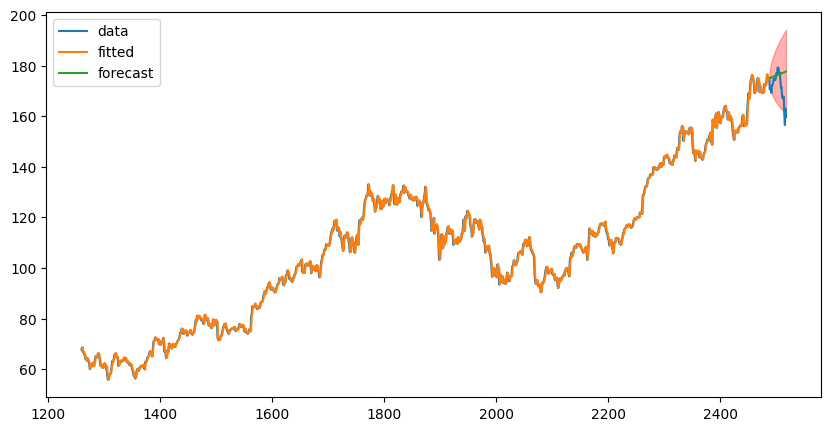

In [32]:
plot_result(model,goog,train,test)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ARIMA rmse 169.43099999999998
Niave rmse 169.43099999999998


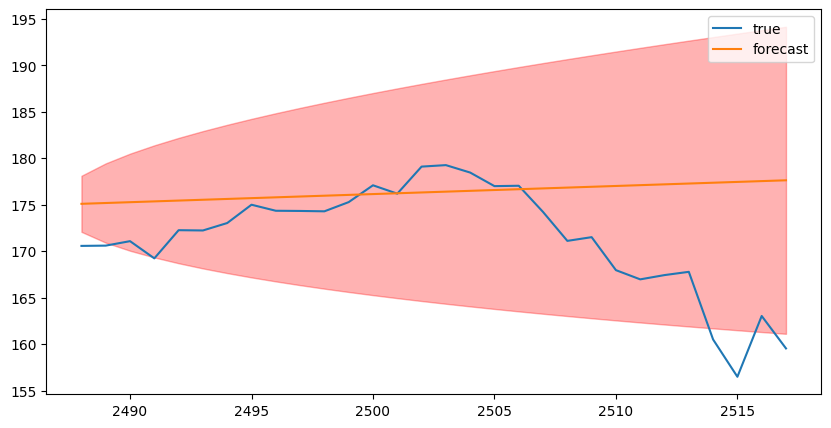

In [33]:
plot_test(model,test)

print("ARIMA rmse",rmse(model.predict(Ntest),test))
print("Niave rmse",rmse(train.iloc[-1],test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5131.500, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5126.697, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5128.274, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5128.247, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5125.216, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5129.649, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.041 seconds


{'maxiter': 10,
 'method': 'lbfgs',
 'order': (0, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

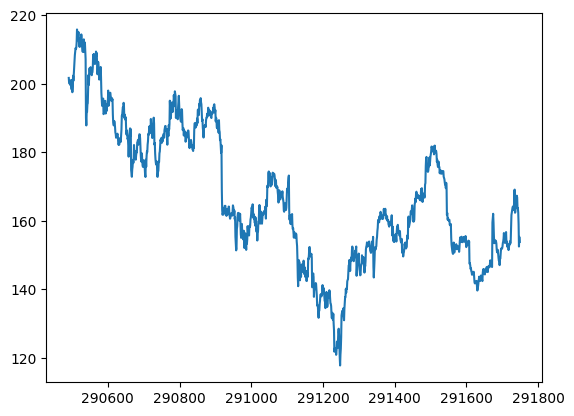

In [35]:
# For IBM 

goog = df[df['Name'] == 'IBM']['close']
goog.plot()
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

model = pm.auto_arima(train,
                     error_action='ignore',trace = True,
                     suppress_warnings=True,maxiter=10,
                     seasonal=False)
model.summary()
model.get_params()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


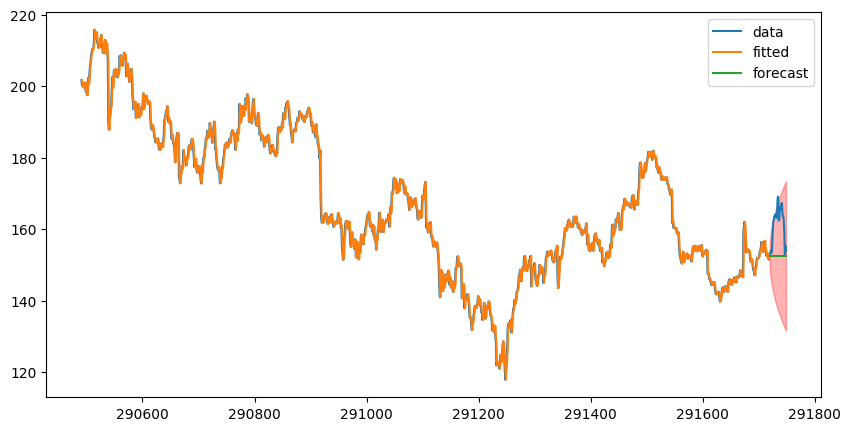

In [36]:
plot_result(model,goog,train,test)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ARIMA rmse 159.24866666666668
Niave rmse 159.24866666666668


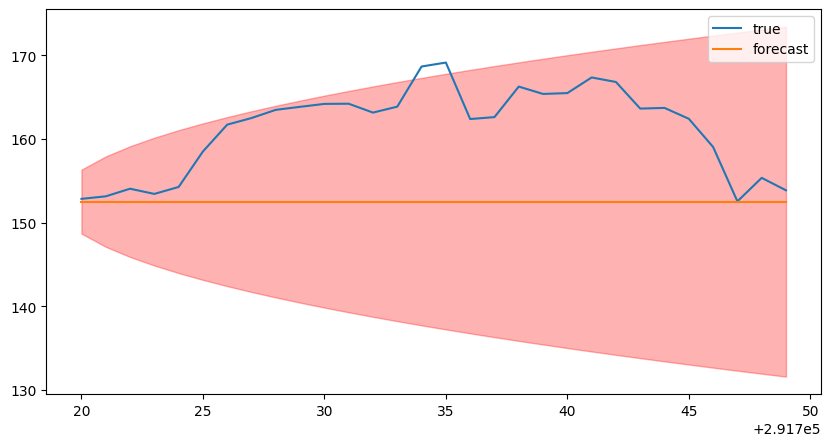

In [37]:
plot_test(model,test)

print("ARIMA rmse",rmse(model.predict(Ntest),test))
print("Niave rmse",rmse(train.iloc[-1],test))

In [38]:
# out of all the above predicted all are doing the random walk 
# can't be predicted 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2280.929, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2282.209, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2284.024, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2284.009, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2282.052, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2277.921, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2284.483, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2285.930, Time=0.43 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2277.255, Time=0.62 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2277.069, Time=0.46 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2278.726, Time=0.61 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2278.855, Time=0.76 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=2277.540, Time=0.19 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 4.620 seconds


{'maxiter': 10,
 'method': 'lbfgs',
 'order': (0, 1, 3),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

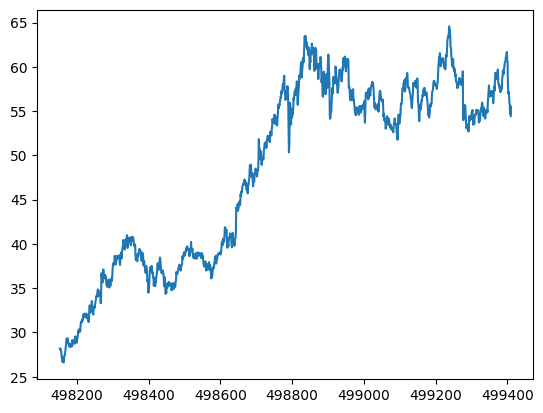

In [39]:
# For SBUX --> its not showing the random walk

goog = df[df['Name'] == 'SBUX']['close']
goog.plot()
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

model = pm.auto_arima(train,
                     error_action='ignore',trace = True,
                     suppress_warnings=True,maxiter=10,
                     seasonal=False)
model.summary()
model.get_params()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


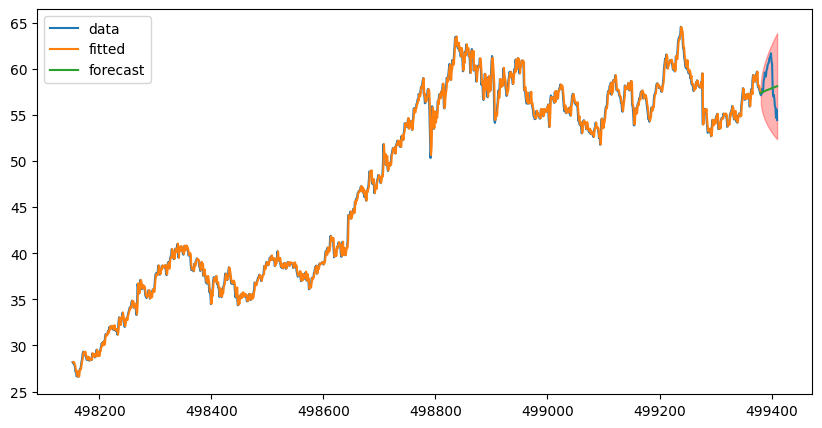

In [40]:
plot_result(model,goog,train,test)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ARIMA rmse 56.56100000000001
Niave rmse 56.56100000000001


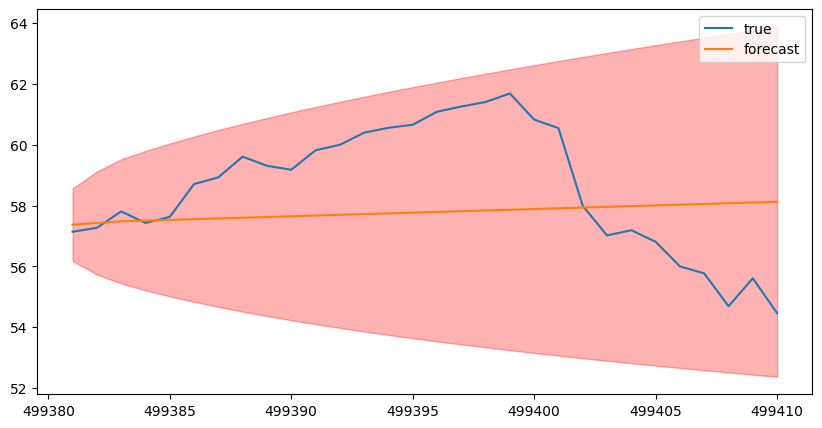

In [41]:
plot_test(model,test)

print("ARIMA rmse",rmse(model.predict(Ntest),test))
print("Niave rmse",rmse(train.iloc[-1],test))